<a href="https://colab.research.google.com/github/Smjfirna/superstore_analysis/blob/main/notebook/Superstore_%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Super Store Sales Analysist

**Description**: This project aims to analyze sales data at retail stores (Super Store) to identify sales patterns, areas of loss, and opportunities for profit improvement.

**Dataset**: Taken from [Kaggle Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final), which contains 9,994 rows of data containing information on product transactions, customer data, discounts, profits, and shipping.


## Import Library

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np

In [ ]:
#data retrieved using the Kaggle API
files.upload()

{}

In [ ]:
# Create a .kaggle folder and copy kaggle.json into the folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions so that files cannot be read by the public
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#Download dataset
!kaggle datasets download -d vivek468/superstore-dataset-final

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
#Unzip file format
!unzip superstore-dataset-final.zip

unzip:  cannot find or open superstore-dataset-final.zip, superstore-dataset-final.zip.zip or superstore-dataset-final.zip.ZIP.


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Ambil nama file pertama
filename = list(uploaded.keys())[0]

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
# Read the ‘Sample - Superstore.csv’ dataset and save it to the DataFrame df
# The parameter encoding=‘ISO-8859-1’ is used to avoid errors when reading special characters
# that often appear in CSV files with non-UTF-8 formats (e.g., accented characters or certain symbols)
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#view dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## EDA dan Cleaning


1. Change the data type of the ship date and order date columns to Datetime format.
2. Since the Order ID is not unique based on each customer's transaction on the same date, return the Row ID as the PK.
3. Check for duplicate and null data, then clean it up.

In [ ]:
#Change the data type of the Order data and Ship date columns to datetime.
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
#check for duplicate and null data
duplicate = df.duplicated(subset='Row ID').sum()
Nul = df.isnull().sum()

print(duplicate)
print(Nul)

0
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
#check the unique value of each column
df.nunique().sort_values()

,0
Country,1
Segment,3
Category,3
Ship Mode,4
Region,4
Discount,12
Quantity,14
Sub-Category,17
State,49
City,531


In [ ]:
#Check the dataframe information after making changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Specific Purpose of the Analysis

1. Understand sales trends based on time and product category.
2. Identify products or categories with low margins but large discounts.
3. Observe shipping patterns and their relationship to profit.
4. Provide insights and strategic recommendations to increase profit.


## Time Analysis

In [ ]:
#create a Order_Month column
df['Order_Month'] = df['Order Date'].dt.to_period('M')

In [ ]:
#calculate total monthly sales
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)
monthly_sales.tail(10)

,Order_Month,Sales
38,2017-03,58872.3528
39,2017-04,36521.5361
40,2017-05,44261.1102
41,2017-06,52981.7257
42,2017-07,45264.4160
43,2017-08,63120.8880
44,2017-09,87866.6520
45,2017-10,77776.9232
46,2017-11,118447.8250
47,2017-12,83829.3188


### Sales by Month


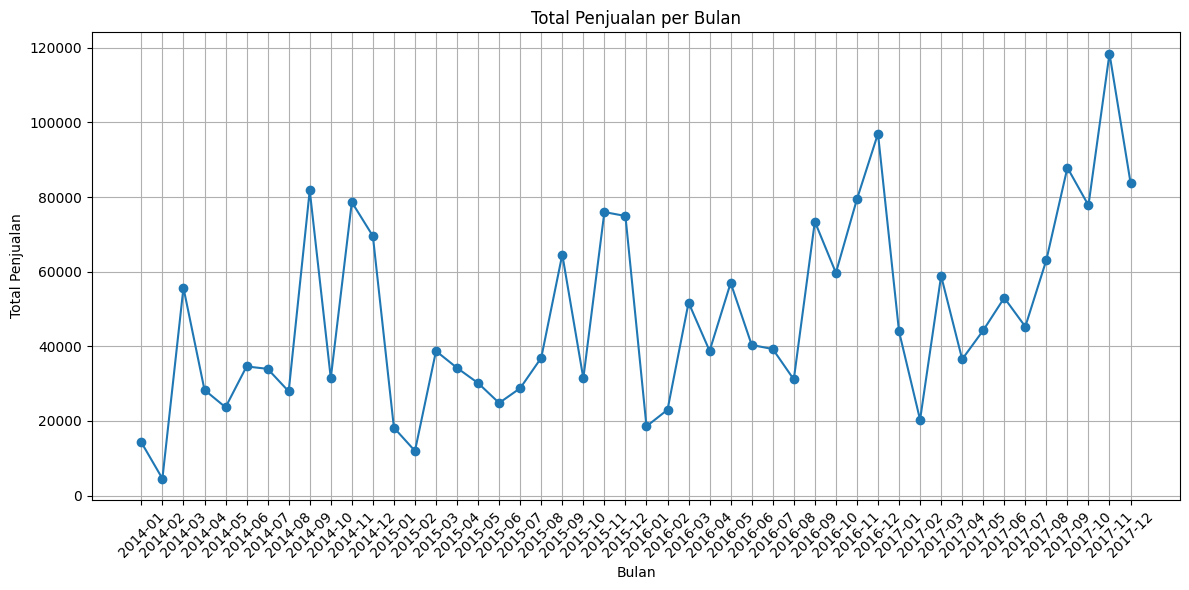

In [ ]:
#visualize monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Sales'], marker='o')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Since the product order date data in date time format is not effectively visualized, add a month column so that sales figures can be totaled in a format that is easier to visualize.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
(df['Sales'].sum(), df['Profit'].sum(), len(df))

(np.float64(2297200.8603000003), np.float64(286397.0217), 9994)

In [ ]:
print(df['Sales'].head(10))
print(df['Profit'].head(10))

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
5     48.8600
6      7.2800
7    907.1520
8     18.5040
9    114.9000
Name: Sales, dtype: float64
0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
5     14.1694
6      1.9656
7     90.7152
8      5.7825
9     34.4700
Name: Profit, dtype: float64


In [ ]:
#create Month adn year column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
# Create Month_Name Column and Set from number format to name
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])

In [ ]:
# Arrange the order of month names categorically according to the order of month names in the calendar.
month_order = list(calendar.month_name[1:])  # ['January', ..., 'December']
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

In [ ]:
df.Month_Name.unique()

['November', 'June', 'October', 'April', 'December', ..., 'July', 'September', 'January', 'March', 'February']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']

In [ ]:
#create summary sales variabel
summary_sales = df.groupby(['Year', 'Month_Name'])['Sales'].sum().reset_index()
summary_sales = summary_sales.sort_values(['Year', 'Month_Name']).reset_index(drop=True)
print(summary_sales)

    Year Month_Name        Sales
0   2014    January   14236.8950
1   2014   February    4519.8920
2   2014      March   55691.0090
3   2014      April   28295.3450
4   2014        May   23648.2870
5   2014       June   34595.1276
6   2014       July   33946.3930
7   2014     August   27909.4685
8   2014  September   81777.3508
9   2014    October   31453.3930
10  2014   November   78628.7167
11  2014   December   69545.6205
12  2015    January   18174.0756
13  2015   February   11951.4110
14  2015      March   38726.2520
15  2015      April   34195.2085
16  2015        May   30131.6865
17  2015       June   24797.2920
18  2015       July   28765.3250
19  2015     August   36898.3322
20  2015  September   64595.9180
21  2015    October   31404.9235
22  2015   November   75972.5635
23  2015   December   74919.5212
24  2016    January   18542.4910
25  2016   February   22978.8150
26  2016      March   51715.8750
27  2016      April   38750.0390
28  2016        May   56987.7280
29  2016  

/tmp/ipython-input-2884047590.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_sales = df.groupby(['Year', 'Month_Name'])['Sales'].sum().reset_index()


In [ ]:
#view sales by year
summary_sales2 = df.groupby(['Year'])['Sales'].sum().reset_index()
summary_sales2 = summary_sales2.sort_values(['Year']).reset_index(drop=True)
print(summary_sales2)

   Year        Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


### Profit by Month

In [ ]:
#create summary profit variabel
summary_profit = df.groupby(['Year', 'Month_Name'])['Profit'].sum().reset_index()
summary_profit = summary_profit.sort_values(['Year', 'Month_Name']).reset_index(drop=True)
print(summary_profit)

    Year Month_Name      Profit
0   2014    January   2450.1907
1   2014   February    862.3084
2   2014      March    498.7299
3   2014      April   3488.8352
4   2014        May   2738.7096
5   2014       June   4976.5244
6   2014       July   -841.4826
7   2014     August   5318.1050
8   2014  September   8328.0994
9   2014    October   3448.2573
10  2014   November   9292.1269
11  2014   December   8983.5699
12  2015    January  -3281.0070
13  2015   February   2813.8508
14  2015      March   9732.0978
15  2015      April   4187.4962
16  2015        May   4667.8690
17  2015       June   3335.5572
18  2015       July   3288.6483
19  2015     August   5355.8084
20  2015  September   8209.1627
21  2015    October   2817.3660
22  2015   November  12474.7884
23  2015   December   8016.9659
24  2016    January   2824.8233
25  2016   February   5004.5795
26  2016      March   3611.9680
27  2016      April   2977.8149
28  2016        May   8662.1464
29  2016       June   4750.3781
30  2016

/tmp/ipython-input-2354200529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_profit = df.groupby(['Year', 'Month_Name'])['Profit'].sum().reset_index()


In [ ]:
df['Sales'].sum()

np.float64(2297200.8603000003)

In [ ]:
#view profit by year
summary_profit2 = df.groupby(['Year'])['Profit'].sum().reset_index()
summary_profit2 = summary_profit2.sort_values(['Year']).reset_index(drop=True)
print(summary_profit2)

   Year      Profit
0  2014  49543.9741
1  2015  61618.6037
2  2016  81795.1743
3  2017  93439.2696


/tmp/ipython-input-3387900695.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_month = df.groupby(['Year', 'Month_Name'])[['Sales','Profit']].sum().reset_index()


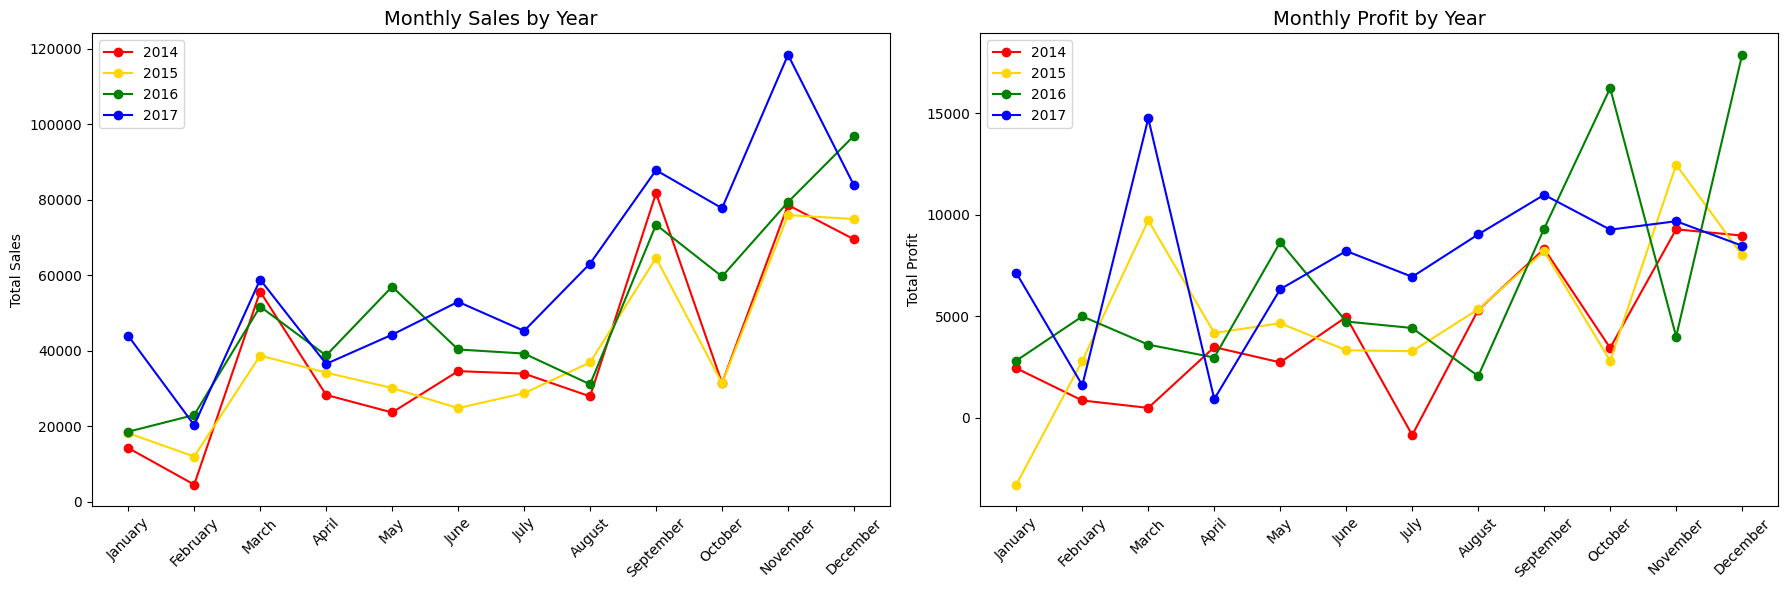

In [ ]:
# Hitung sales dan profit per bulan per tahun
summary_month = df.groupby(['Year', 'Month_Name'])[['Sales','Profit']].sum().reset_index()

# Pastikan tahun urut
years = sorted(summary_month['Year'].unique())

# Warna sesuai urutan tahun: merah → kuning → hijau → biru
colors = ['red', 'gold', 'green', 'blue']

# Buat canvas 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# ----- SALES -----
for year, color in zip(years, colors):
    data = summary_month[summary_month['Year'] == year]
    axes[0].plot(data['Month_Name'], data['Sales'], marker='o', label=str(year), color=color)

axes[0].set_title('Monthly Sales by Year', fontsize=14)
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# ----- PROFIT -----
for year, color in zip(years, colors):
    data = summary_month[summary_month['Year'] == year]
    axes[1].plot(data['Month_Name'], data['Profit'], marker='o', label=str(year), color=color)

axes[1].set_title('Monthly Profit by Year', fontsize=14)
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

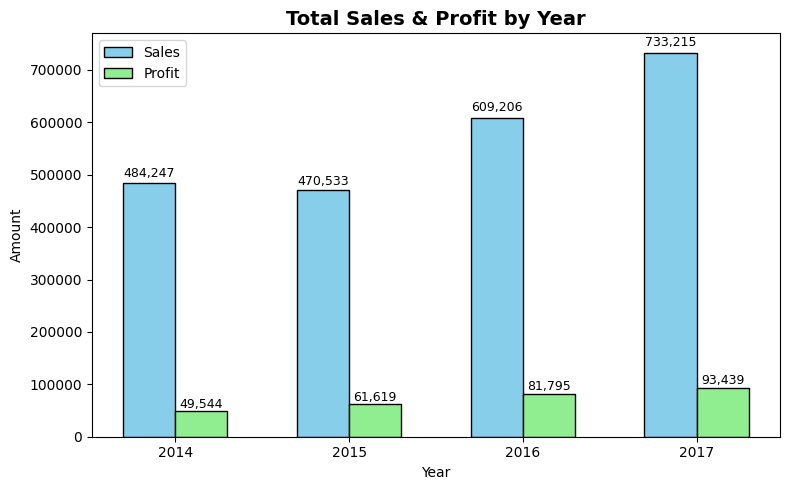

In [ ]:
# Group sales & profit by year
summary_year = df.groupby(['Year'])[['Sales','Profit']].sum().reset_index()
summary_year = summary_year.sort_values('Year')

# Data
years = summary_year['Year']
sales = summary_year['Sales']
profit = summary_year['Profit']

# Bar position
x = np.arange(len(years))
width = 0.30

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, sales, width, label="Sales", color="skyblue", edgecolor="black")
bars2 = plt.bar(x + width/2, profit, width, label="Profit", color="lightgreen", edgecolor="black")

# Tambahkan angka di atas bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.01*yval),
             f"{yval:,.0f}", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.01*yval),
             f"{yval:,.0f}", ha='center', va='bottom', fontsize=9)

plt.xticks(x, years)
plt.title("Total Sales & Profit by Year", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

#### Time analysis by year and month sales profit with recommendations

1. Seasonal Patterns
- Seasonal patterns are repetitive. Increases and decreases are almost the same every month.
- July-August tends to experience a decline in sales and profits. These months coincide with long holidays, so spending tends to be reduced for clothing or tertiary needs. Special promotional strategies should be implemented mid-year to prevent the decline from becoming too steep.  
- September marks the peak of annual sales and profit growth.  
- Q4 experiences stable growth compared to other months each year. This season coincides with year-end festivals and the start of the school semester. Focus on promotions, campaigns, and inventory to meet surging demand and maximize profits.

2. Year-on-Year Growth
- Generally, monthly trends show a year-on-year increase, although the ups and downs are relatively consistent.
- In other words, the company has successfully maintained seasonal patterns while also achieving year-on-year sales growth.

## Product Analysis

View sales analysis by product category

1. View the most purchased categories based on order ID
2. View the product categories with the highest sales and profits


In [ ]:
#unique values in the category
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df.rename(columns={'Sub-Category': 'Sub_Category'}, inplace=True)

#### Categories Based on Number of Orders

In [ ]:
#the most ordered product categories
category_order_count = df['Category'].value_counts().reset_index()
category_order_count.columns = ['Category', 'Order_Count']
print(category_order_count)

In [ ]:
#the most ordered product sub categories
category_order_count = df['Sub_Category'].value_counts().reset_index()
category_order_count.columns = ['Sub_Category', 'Order_Count']
print(category_order_count)

#### Categories Based on Sales

In [ ]:
#product category with the highest sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

In [ ]:
#product sub category with the highest sales
category_sales = df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

#### Categories Based on Profit

In [ ]:
#product category with the highest profit
category_sales = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

In [ ]:
#product sub category with the highest profit
category_sales = df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

In [ ]:
# Hitung sales dan profit per kategori, lalu urutkan berdasarkan Sales
category_summary = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
category_summary = category_summary.sort_values('Sales', ascending=False)

# Buat posisi batang
x = np.arange(len(category_summary['Category']))
width = 0.35  # lebar batang

fig, ax = plt.subplots(figsize=(8,5))

# Plot Sales
bars1 = ax.bar(x - width/2, category_summary['Sales'], width, label='Sales', color='skyblue')

# Plot Profit
bars2 = ax.bar(x + width/2, category_summary['Profit'], width, label='Profit', color='salmon')

# Tambahkan label & judul
ax.set_xlabel('Kategori Produk')
ax.set_ylabel('Total (USD)')
ax.set_title('Perbandingan Sales vs Profit per Kategori Produk (Urut Sales Terbesar)')
ax.set_xticks(x)
ax.set_xticklabels(category_summary['Category'])
ax.legend()

# Tambahkan angka di atas batang
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3),  # jarak
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Hitung sales dan profit per sub-category
subcategory_summary = df.groupby('Sub_Category')[['Sales','Profit']].sum().reset_index()

# Urutkan berdasarkan Sales terbesar
subcategory_summary = subcategory_summary.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Buat posisi batang
x = np.arange(len(subcategory_summary['Sub_Category']))
width = 0.35  # lebar batang

fig, ax = plt.subplots(figsize=(14,7))

# Plot Sales
bars1 = ax.bar(x - width/2, subcategory_summary['Sales'], width, label='Sales', color='skyblue')

# Plot Profit
bars2 = ax.bar(x + width/2, subcategory_summary['Profit'], width, label='Profit', color='salmon')

# Tambahkan label & judul
ax.set_xlabel('Sub-Kategori Produk')
ax.set_ylabel('Total (USD)')
ax.set_title('Perbandingan Sales vs Profit per Sub-Kategori Produk')
ax.set_xticks(x)
ax.set_xticklabels(subcategory_summary['Sub_Category'], rotation=45, ha='right')
ax.legend()

# Tambahkan angka di atas batang
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3),  # jarak sedikit di atas batang
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung sales dan profit per sub-category
subcategory_summary = df.groupby('Sub_Category')[['Sales','Profit']].sum().reset_index()

# Urutkan berdasarkan Profit terbesar
subcategory_summary = subcategory_summary.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Buat posisi batang
x = np.arange(len(subcategory_summary['Sub_Category']))
width = 0.35  # lebar batang

fig, ax = plt.subplots(figsize=(14,7))

# Plot Sales
bars1 = ax.bar(x - width/2, subcategory_summary['Sales'], width, label='Sales', color='skyblue')

# Plot Profit
bars2 = ax.bar(x + width/2, subcategory_summary['Profit'], width, label='Profit', color='salmon')

# Tambahkan label & judul
ax.set_xlabel('Sub-Kategori Produk')
ax.set_ylabel('Total (USD)')
ax.set_title('Perbandingan Sales vs Profit per Sub-Kategori Produk (Urut Profit)')
ax.set_xticks(x)
ax.set_xticklabels(subcategory_summary['Sub_Category'], rotation=45, ha='right')
ax.legend()

# Tambahkan angka di atas batang
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3),  # jarak sedikit di atas batang
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Sales analysis by product and recommendations

**Product by Category**

1. Technology

- The product with the highest sales and profit is the technology category, with total sales of `$836,154` and profit of `$145,455`.
- The technology product category is the largest contributor to profit, despite requiring significant capital.
- It is highly recommended to maximize marketing strategies and innovation.

2. Office Supplies

- The office supplies category has the lowest sales but decent profit, with sales of `$719,047` and profit of `$122,490`.
- This category has a good balance between sales and profit because most needs are routine, so repeat orders will be high.

3. Furniture

- With relatively high sales of `$741,999` but low profit of `$18,451`, it lags significantly behind other categories.
- This category **requires evaluation of thin margins, large discounts, or high costs due to high sales but low profitability**.

**Product by Sub Category**

1. Furniture (Tables, Chairs, Bookcases, Furnishings)

- The **Chairs** subcategory has the highest sales and fairly good profits. It can be categorized as quite promising.
- **Tables** is a subcategory with high sales but significant losses (negative profits). Further review of this product subcategory is needed.
- **Bookcases** have relatively high sales but incur losses (negative profit). Further review is needed for this subcategory.  
- **Furnishings** have decent sales and small but positive profits.  
- **The furniture product category as a whole faces risks with many subcategories having low or even negative profits. Only Chairs consistently generate profits.**

2. Office Supplies (Binders, Paper, Art, Labels, Supplies, Storage, Appliances, Envelopes, Fasteners)

- Binders and Papers have relatively high sales and are categorized as high profit compared to other subcategories.
- Storage and Appliances are subcategories with relatively good sales and positive profits, albeit slim.
- Supplies and Fasteners have negative profits despite sales. Problematic products require further review in this category.
- The Art, Envelopes, and Labels subcategories have low sales and profits, contributing minimally.
- The Office Supplies category has a mixed profile. Binders and Paper are key profit contributors, while Supplies and Labels require reevaluation.

3. Technology Category (Phones, Machines, Accessories, Copiers)

- Phones are the products with the highest sales and the top 2 products with the highest profits.
- Copiers, despite not having very high sales, generate the highest profits.
- Accessories also have fairly good sales and are among the top 3 highest profits.
- However, the machine subcategory, despite having fairly high sales, generates very low profits.
- The technology category is the category with the best sales and profits. This category drives overall revenue and profit. However, Machines are risky and require new pricing/distribution strategies.



#### Conclusion

From the analysis by category and subcategory, it is evident that Technology is the main driver of profit and needs to be maximized, especially for Phones, Copiers, and Accessories. Office Supplies tend to be stable with potential repeat orders, although some subcategories (Supplies, Fasteners) need to be evaluated. Meanwhile, Furniture presents significant risks with some sub-categories incurring losses (Tables, Bookcases), so pricing strategies and cost efficiency must be reviewed immediately.

## Demografris Analysis

In [ ]:
#semua data berasal dari negara United States'
df.Country.unique()

array(['United States'], dtype=object)

In [ ]:
#region with the highest sales
category_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

    Region        Sales
0     West  725457.8245
1     East  678781.2400
2  Central  501239.8908
3    South  391721.9050


In [ ]:
#region with the highest Profit
category_sales = df.groupby('Region')['Profit'].sum().sort_values(ascending=False).reset_index()
print(category_sales)

    Region       Profit
0     West  108418.4489
1     East   91522.7800
2    South   46749.4303
3  Central   39706.3625


<Figure size 1000x600 with 0 Axes>

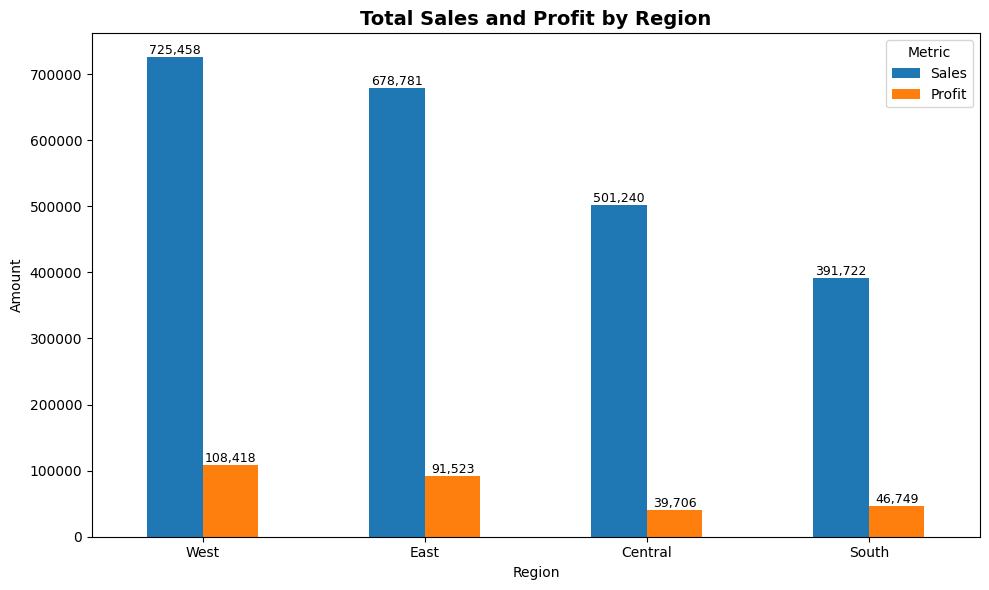

In [ ]:
# Hitung total sales & profit per region
region_summary = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

# Plot
plt.figure(figsize=(10,6))
bar = region_summary[["Sales", "Profit"]].plot(kind="bar", figsize=(10,6))

# Tambahkan label angka di atas bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), ',.0f'),  # format angka ribuan
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.title("Total Sales and Profit by Region", fontsize=14, fontweight='bold')
plt.ylabel("Amount")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

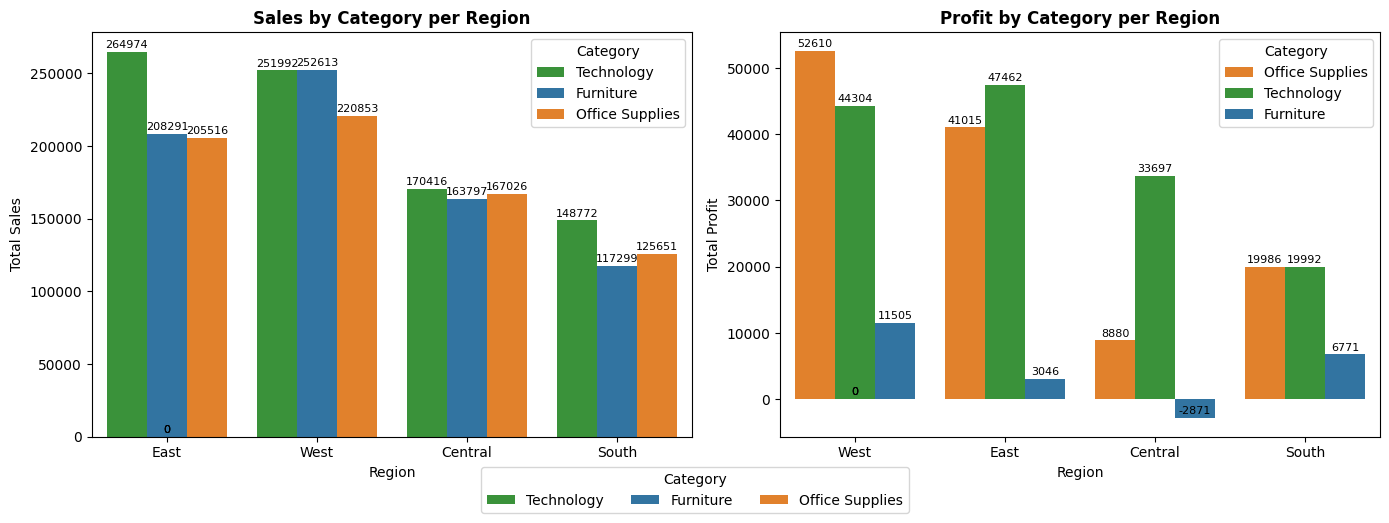

In [ ]:
# Calculate total sales and profits per region and category
region_category_summary = df.groupby(["Region", "Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by highest sales and profit
region_category_summary_sales = region_category_summary.sort_values("Sales", ascending=False)
region_category_summary_profit = region_category_summary.sort_values("Profit", ascending=False)

# Determine consistent colors for each category
palette = {
    "Furniture": "#1f77b4",
    "Office Supplies": "#ff7f0e",
    "Technology": "#2ca02c"
}

#--Sales--
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharex=False)

#sales plot
sns.barplot(
    data=region_category_summary_sales,
    x="Region", y="Sales", hue="Category", ax=axes[0],
    order=region_category_summary_sales["Region"].unique(),
    palette=palette
)
axes[0].set_title("Sales by Category per Region", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Total Sales")
axes[0].set_xlabel("Region")

# bar number
for p in axes[0].patches:
    axes[0].annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 5), textcoords = 'offset points',
        fontsize=8, color="black"
    )

# --- Profit ---
sns.barplot(
    data=region_category_summary_profit,
    x="Region", y="Profit", hue="Category", ax=axes[1],
    order=region_category_summary_profit["Region"].unique(),
    palette=palette
)
axes[1].set_title("Profit by Category per Region", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Total Profit")
axes[1].set_xlabel("Region")

# bar number
for p in axes[1].patches:
    axes[1].annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 5), textcoords = 'offset points',
        fontsize=8, color="black"
    )

# legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Category", loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()

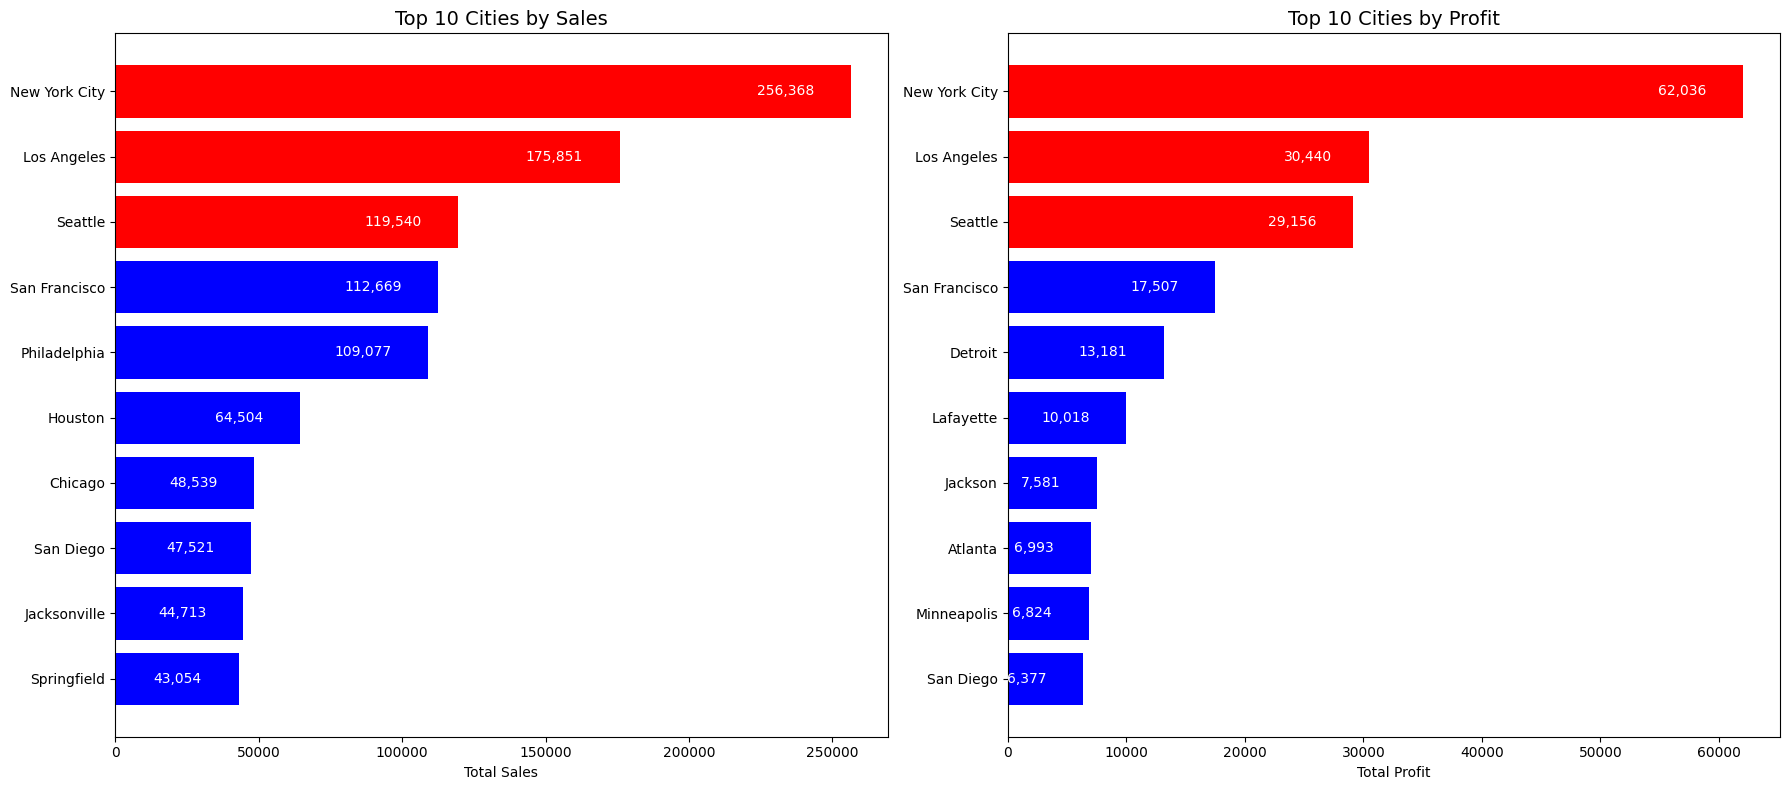

In [ ]:
# Calculate total Sales & Profit per City
city_summary = df.groupby('City')[['Sales','Profit']].sum().reset_index()

#Top 10 based on Sales & Profit
top10_sales = city_summary.sort_values('Sales', ascending=False).head(10)
top10_profit = city_summary.sort_values('Profit', ascending=False).head(10)

# plot 2 column
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# -- SALES --
colors_sales = ['red' if i < 3 else 'blue' for i in range(len(top10_sales))]
bars_sales = axes[0].barh(top10_sales['City'], top10_sales['Sales'], color=colors_sales)
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Cities by Sales", fontsize=14)
axes[0].set_xlabel("Total Sales")

# bar number
for bar in bars_sales:
    width = bar.get_width()
    axes[0].text(width - (0.05 * top10_sales['Sales'].max()),  # posisi agak ke kiri ujung bar
                 bar.get_y() + bar.get_height()/2,
                 f"{int(width):,}", va='center', ha='right', fontsize=10, color='white')

# -- PROFIT --
colors_profit = ['red' if i < 3 else 'blue' for i in range(len(top10_profit))]
bars_profit = axes[1].barh(top10_profit['City'], top10_profit['Profit'], color=colors_profit)
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Cities by Profit", fontsize=14)
axes[1].set_xlabel("Total Profit")

# bar number
for bar in bars_profit:
    width = bar.get_width()
    axes[1].text(width - (0.05 * top10_profit['Profit'].max()),
                 bar.get_y() + bar.get_height()/2,
                 f"{int(width):,}", va='center', ha='right', fontsize=10, color='white')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate Sales & Profit per City
city_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

# Top 10 Sales
top10_sales = city_summary.sort_values("Sales", ascending=False).head(10)

# Sales vs Profit
plt.figure(figsize=(12,6))
sns.barplot(data=top10_sales, x="City", y="Sales", color="skyblue", label="Sales")
sns.barplot(data=top10_sales, x="City", y="Profit", color="orange", label="Profit")

plt.xticks(rotation=45)
plt.title("Top 10 Cities by Sales (Sales vs Profit)")
plt.legend()
plt.show()

In [ ]:
# Summary of Sales & Profit per City
city_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

# Sort by Top 10 largest sales
top10_sales = city_summary.sort_values("Sales", ascending=False).head(10)

# Add category
city_cat_summary = df.groupby(["City", "Category"])[["Sales", "Profit"]].sum().reset_index()

# Filter only Top 10 Sales Cities
city_cat_top10 = city_cat_summary[city_cat_summary["City"].isin(top10_sales["City"])]

# Arrange cities in order according to Sales ranking
city_order = top10_sales["City"].tolist()
city_cat_top10["City"] = pd.Categorical(city_cat_top10["City"], categories=city_order, ordered=True)

# Profit per Category pada Top 10 Sales Cities
plt.figure(figsize=(12,5))
sns.barplot(
    data=city_cat_top10,
    x="City",
    y="Profit",
    hue="Category",
    order=city_order
)

plt.xticks(rotation=45)
plt.title("Profit Distribution by Category (Top 10 Sales Cities)", fontsize=13, weight="bold")
plt.ylabel("Total Profit")
plt.xlabel("City (Top 10 by Sales)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Sort by Top 10 Highest Profits
top10_profit = city_summary.sort_values("Profit", ascending=False).head(10)

# Add category
city_cat_summary = df.groupby(["City", "Category"])["Profit"].sum().reset_index()

# Filter only the top 10 Profit Cities
city_cat_top10 = city_cat_summary[city_cat_summary["City"].isin(top10_profit["City"])]

# Arrange cities in order of profit ranking
city_order = top10_profit["City"].tolist()
city_cat_top10["City"] = pd.Categorical(city_cat_top10["City"], categories=city_order, ordered=True)

# Profit Visualization per Category
plt.figure(figsize=(12,6))
sns.barplot(
    data=city_cat_top10,
    x="City",
    y="Profit",
    hue="Category",
    order=city_order
)

plt.xticks(rotation=45)
plt.title("Profit Distribution by Category (Top 10 Profit Cities)", fontsize=14, weight="bold")
plt.ylabel("Total Profit")
plt.xlabel("City (Top 10 by Profit)")
plt.legend(title="Category")
plt.show()

In [ ]:
df.City.count()

In [ ]:
# Summary of Sales & Profit per City
city_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

# Filter cities with Sales > 0 but Profit < 0
loss_cities = city_summary[(city_summary["Sales"] > 0) & (city_summary["Profit"] < 0)]

# Sort for clarity: based on highest sales
loss_cities = loss_cities.sort_values("Sales", ascending=False).reset_index(drop=True)

loss_cities

In [ ]:
# Summary of Sales & Profit per City
city_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

# Filter cities with negative profit
loss_cities = city_summary[city_summary["Profit"] < 0]

# Take the Top 10 based on the highest sales (even if the profit is negative)
top10_loss_cities = loss_cities.sort_values("Sales", ascending=False).head(10).reset_index(drop=True)

# Add Profit Margin
top10_loss_cities["Profit Margin (%)"] = (top10_loss_cities["Profit"] / top10_loss_cities["Sales"]) * 100

top10_loss_cities

In [ ]:
# Visualization of Sales vs Profit in the Top 10 Loss Cities
plt.figure(figsize=(12,5))
top10_loss_melt = top10_loss_cities.melt(id_vars="City", value_vars=["Sales", "Profit"],
                                         var_name="Metric", value_name="Amount")

sns.barplot(data=top10_loss_melt, x="City", y="Amount", hue="Metric")
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Sales but Negative Profit", fontsize=13, weight="bold")
plt.ylabel("Amount")
plt.xlabel("City")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [ ]:
# Get the list of the top 10 cities with the highest losses
loss_city_list = top10_loss_cities["City"].tolist()

# the loss city Profit per Category
loss_city_cat = df[df["City"].isin(loss_city_list)] \
    .groupby(["City", "Category"])[["Sales", "Profit"]].sum().reset_index()

# Add Profit Margin
loss_city_cat["Profit Margin (%)"] = (loss_city_cat["Profit"] / loss_city_cat["Sales"]) * 100

# Sort cities by highest sales ranking
loss_city_cat["City"] = pd.Categorical(loss_city_cat["City"], categories=loss_city_list, ordered=True)

loss_city_cat

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=loss_city_cat,
    x="City",
    y="Profit",
    hue="Category",
    order=loss_city_list
)

plt.axhline(0, color="red", linestyle="--")
plt.xticks(rotation=45)
plt.title("Profit by Category in Top 10 Cities with High Sales but Negative Profit", fontsize=13, weight="bold")
plt.ylabel("Total Profit")
plt.xlabel("City")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [ ]:
# all cities with negative profits
loss_cities = city_summary[city_summary["Profit"] < 0]["City"].tolist()

# Summarize data by category
loss_cat_summary = df[df["City"].isin(loss_cities)] \
    .groupby("Category")[["Sales", "Profit"]].sum().reset_index()

# Add Profit Margin
loss_cat_summary["Profit Margin (%)"] = (loss_cat_summary["Profit"] / loss_cat_summary["Sales"]) * 100

print(loss_cat_summary)

#
plt.figure(figsize=(8,5))
sns.barplot(
    data=loss_cat_summary,
    x="Category",
    y="Profit",
    palette="Set2"
)

plt.axhline(0, color="red", linestyle="--")
plt.title("Total Profit by Category (Across All Loss Cities)", fontsize=13, weight="bold")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.show()

Based on Region

1. **West** is the region with the **highest sales and profits**.
   
   *Recommendation:* Make this region a **top priority** in your sales strategy. Implement promotions that focus more on high-margin products to maximize profits.

2. In the **West** region, the **Furniture** category has the **highest sales but very low profits**.
   
   *Recommendation:* Conduct a **price & discount evaluation** for the Furniture category. Another alternative is to strengthen upselling of products in the **Technology** and **Office Supplies** categories, which have a relatively stable contribution to profits.

3. The **East and South** regions show **fairly good sales**, close to the West, but with the same pattern: **Furniture → high sales, low profit**.
   
   *Recommendation:* Implement a similar strategy, such as **price optimization, selective discounts, or bundling** for Furniture, so that the gap between sales and profit can be more balanced.

4. **Central** has **fairly balanced sales** across categories, but:
   * **Furniture → negative profit**
   * **Office Supplies → low sales**
   * **Technology → stable with positive profit**
     
      Recommendation: Evaluate discount strategies for **Furniture & Office Supplies**. Strengthen promotions for **Technology** as it has the potential to be the main profit contributor in this region.


### **Based on City**

5. **Top 3 cities with the highest sales and profits:**

   * **New York City, Los Angeles, Seattle**
     *Recommendation:* Focus your **Technology** category promotions in these cities because they contribute the most to profits, followed by **Office Supplies** and **Furniture**.

6. **New York City** is the city with the largest profit contribution.
   
   *Recommendation:* Make it the **main marketing hub** for **Technology** products. Increase the penetration of these products with special promotional campaigns.

7. There are cities with **high sales but negative profits**, which have the potential to erode profits.

   * Examples: **Philadelphia, Houston, Chicago** (among the top 10 in sales, but with negative profits).

      Recommendation: Conduct a **discount strategy evaluation** in these cities and identify the categories contributing to losses, especially **Furniture**, to avoid promotions that actually reduce margins.

8. **Furniture** is again the category with the **largest negative profit contribution** in cities with sales > 0.
   
   *Recommendation:* There needs to be a **comprehensive review** of the Furniture category sales strategy in major cities so that it does not continue to be a burden on profits.

**Key Conclusions:**

* **West Region & New York City** → profit center, should be a strategic priority.
* **Furniture** → high sales but low/negative profits → need to improve pricing & promotion strategies.
* **Technology** → most consistent profit-generating category → increase promotion & distribution in all regions, especially Central & major cities.

#Discount

####Analysis

After further investigation, even with a 10% discount, profits are still negative. Therefore, further analysis is needed to determine the following possibilities:

1. The selling price is too low, so when the discount is applied, there is no profit.
2. The discount is applied to products with low margins.
3. Shipping costs are high and are not covered by the selling price.
4. The promotion is applied to the wrong target market, resulting in no repeat orders.

In [ ]:
# Calculate the average discount per category and sort from highest to lowest
avg_discount_category = df.groupby("Category")["Discount"].mean().reset_index()
avg_discount_category = avg_discount_category.sort_values(by="Discount", ascending=False)
print(avg_discount_category)

In [ ]:
# Calculate the average discount per Region and Category and sort
discount_summary = df.groupby(["Region", "Category"])["Discount"].mean().reset_index()
discount_summary = discount_summary.sort_values(by="Discount", ascending=False)

# Visualize
plt.figure(figsize=(10,6))
ax = sns.barplot(data=discount_summary, x="Region", y="Discount", hue="Category")

plt.title("Rata-rata Diskon per Kategori dan Region", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Diskon (%)")
plt.xlabel("Region")
plt.ylim(0, discount_summary["Discount"].max() + 0.05)  # kasih ruang di atas
plt.legend(title="Category")

# Add label(%)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

West
1. Region with the highest sales and profits. However, although Furniture contributes significantly to sales, its profits are low. The average discounts for Furniture (13.1%) and Office Supplies (9.3%) are relatively lower than in other regions, meaning that low profits in Furniture are not due to high discounts, but possibly due to high costs or inappropriate pricing strategies.
2. Technology contributes steadily to both sales and profits.

East
1. Technology is the largest contributor to sales and profit. Office Supplies also generates significant profit. Average discounts are moderate (Furniture 15.4%, Office Supplies 14.3%, Technology 14.3%) and fairly balanced. It is important to ensure that discounts do not become too large in order to maintain safe margins.

South
1. Sales are fairly good, with a relatively balanced distribution across categories.
2. Profits from Technology & Office Supplies are stable, but Furniture profits are low. Average discounts are low (Furniture 12.2%, Office Supplies 16.7%, Technology 10.8%) → meaning the profit problem in Furniture is not due to large discounts, but rather pricing/cost.
3. There is a significant opportunity in Office Supplies because discounts are fairly high but still generate profit → promotions can be expanded.

Central
1. Sales are quite large but Furniture is losing money (negative profit). The average discount is the highest (Furniture 29.7%, Office Supplies 25.3%) and is too aggressive, cutting into profits. Discounts on Furniture & Office Supplies need to be evaluated, as they have proven to be ineffective.
2. Technology remains the savior of profits despite a 13.3% discount.

Diskon by city Analyze

In [ ]:
# Find the 3 cities with the highest sales and profits
top3_sales_cities = df.groupby('City')['Sales'].sum().nlargest(3).index.tolist()
top3_profit_cities = df.groupby('City')['Profit'].sum().nlargest(3).index.tolist()

# Merge
top_cities = list(set(top3_sales_cities + top3_profit_cities))

# Filter data only for those cities
df_top = df[df['City'].isin(top_cities)]

# Calculate the average discount per category per city
city_category_discount = (
    df_top.groupby(['City', 'Category'])['Discount']
    .mean()
    .reset_index()
)
city_category_discount['Discount (%)'] = city_category_discount['Discount'] * 100

# Add profit information for comparison
city_category_profit = (
    df_top.groupby(['City', 'Category'])['Profit']
    .sum()
    .reset_index()
)

# Merge diskon + profit
merged = city_category_discount.merge(city_category_profit, on=['City','Category'])

print(merged)

# 6. Visualize
plt.figure(figsize=(12,6))
sns.barplot(
    data=merged,
    x='Category',
    y='Discount (%)',
    hue='City',
    palette='Set2'
)

# Label
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,
             p.get_height() + 0.5,
             f'{p.get_height():.1f}%',
             ha='center', va='bottom', fontsize=8)

plt.title('Rata-rata Diskon per Kategori\nTop 3 Kota Sales & Profit Tertinggi')
plt.ylabel('Rata-rata Diskon (%)')
plt.xlabel('Kategori')
plt.legend(title='City')
plt.show()

1. Kurangi diskon untuk Furniture (baik di LA maupun NYC), karena sensitif terhadap margin.
2. Pertahankan rendahnya diskon untuk Technology di NYC, terbukti profit tetap tinggi tanpa perlu promosi besar.
3. Evaluasi diskon Technology di LA & Seattle → cek apakah tanpa diskon besar profit bisa tetap tinggi.
4. Office Supplies → sudah optimal, jangan diberi diskon berlebihan.

In [ ]:
# -- Scatterplot Diskon vs Profit --
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # garis profit 0
plt.title("Hubungan Diskon vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

categories = ["Furniture", "Office Supplies", "Technology"]

for i, cat in enumerate(categories):
    ax = axes[i//2, i%2]
    sns.boxplot(
        data=df[df["Category"]==cat],
        x="Discount_Segment",
        y="Profit",
        ax=ax
    )
    ax.axhline(0, color="red", linestyle="--")
    ax.set_title(f"Profit vs Discount Segment - {cat}")
    ax.set_xlabel("Discount Segment")
    ax.set_ylabel("Profit")


fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('file_fix.csv')